In [8]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from torchvision import transforms
from utils import fancy_pca, ColorJitter
from PIL import Image
import os
import random

## Explore label distribution

In [4]:
# load label file of train and validation set
with open('datasets/ai_challenger_scene_train_20170904/scene_train_annotations_20170904.json', 'r') as f:
    labels_train = json.load(f)
    
with open('datasets/ai_challenger_scene_validation_20170908/scene_validation_annotations_20170908.json', 'r') as f:
    labels_val = json.load(f)

In [5]:
tlb_list = []
vlb_list = []

for t in labels_train:
    tlb_list.append(int(t['label_id']))
    
for v in labels_val:
    vlb_list.append(int(v['label_id']))
    
tlb_counter = Counter(tlb_list)
vlb_counter = Counter(vlb_list)

In [9]:
tlb_df = pd.DataFrame.from_dict(tlb_counter, orient='index').reset_index()
tlb_df.columns = ['scene_id', 'frequency']
tlb_df['freq_rate'] = tlb_df['frequency'] / len(tlb_list)

In [10]:
tlb_df

,scene_id,frequency,freq_rate
0,66,755,0.014013
1,61,757,0.014050
2,64,767,0.014236
3,31,458,0.008501
4,19,765,0.014198
5,11,769,0.014273
6,22,702,0.013029
7,47,524,0.009725
8,3,669,0.012417
9,29,765,0.014198


In [11]:
vlb_df = pd.DataFrame.from_dict(vlb_counter, orient='index').reset_index()
vlb_df.columns = ['scene_id', 'frequency']
vlb_df['freq_rate'] = vlb_df['frequency'] / len(vlb_list)

In [12]:
vlb_df

,scene_id,frequency,freq_rate
0,18,108,0.015169
1,13,104,0.014607
2,24,81,0.011376
3,57,62,0.008708
4,48,66,0.009270
5,55,72,0.010112
6,66,86,0.012079
7,47,72,0.010112
8,29,91,0.012781
9,22,94,0.013202


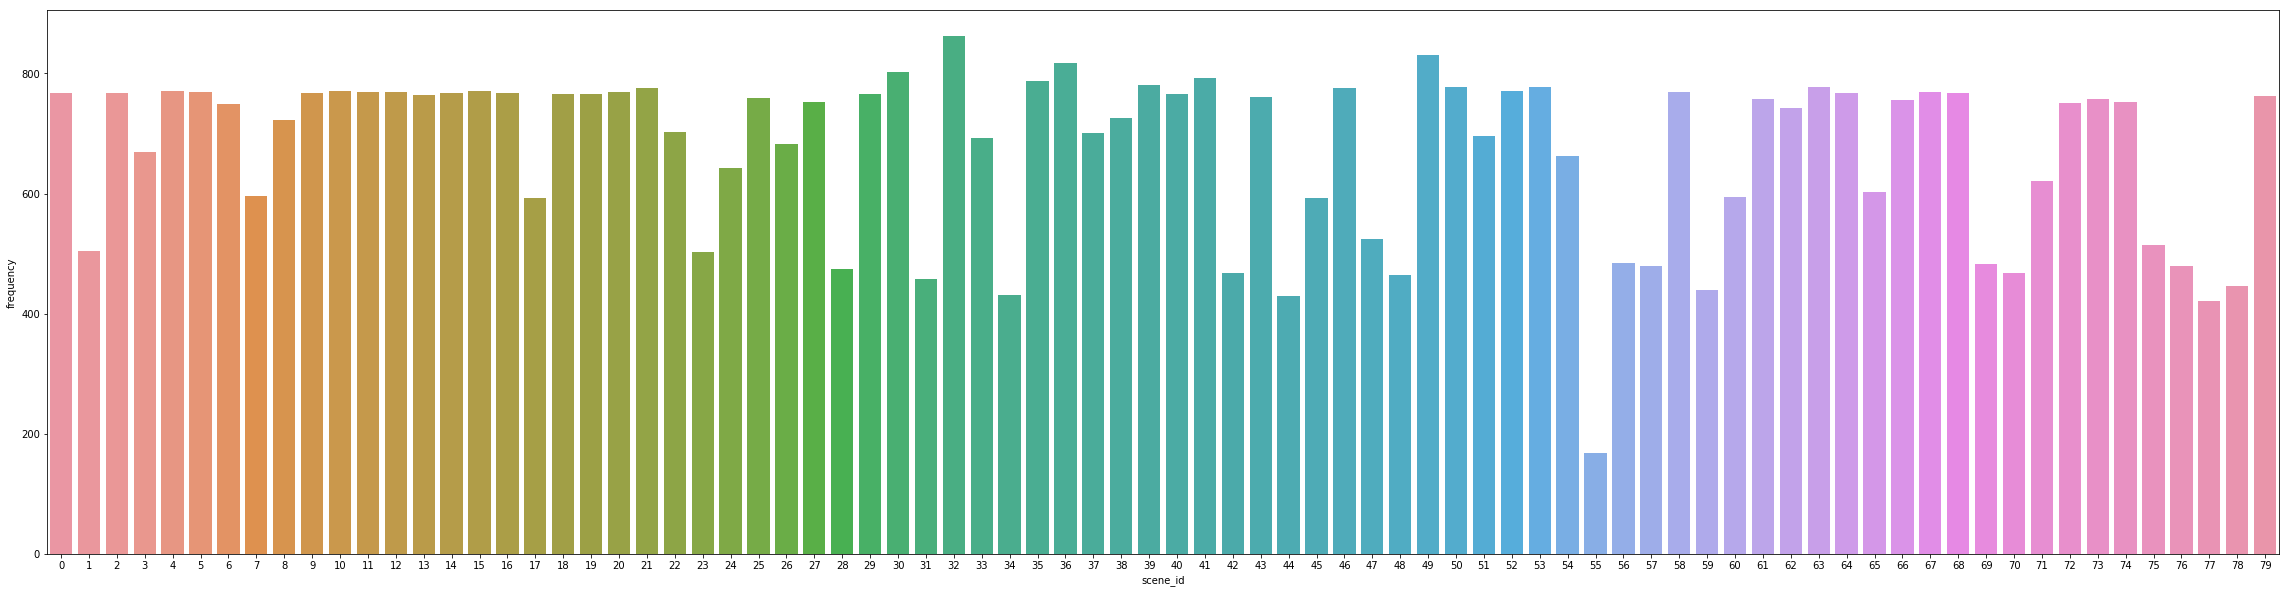

In [22]:
plt.figure(figsize=(40,10))
sns.barplot(x=tlb_df['scene_id'], y=tlb_df['frequency'])

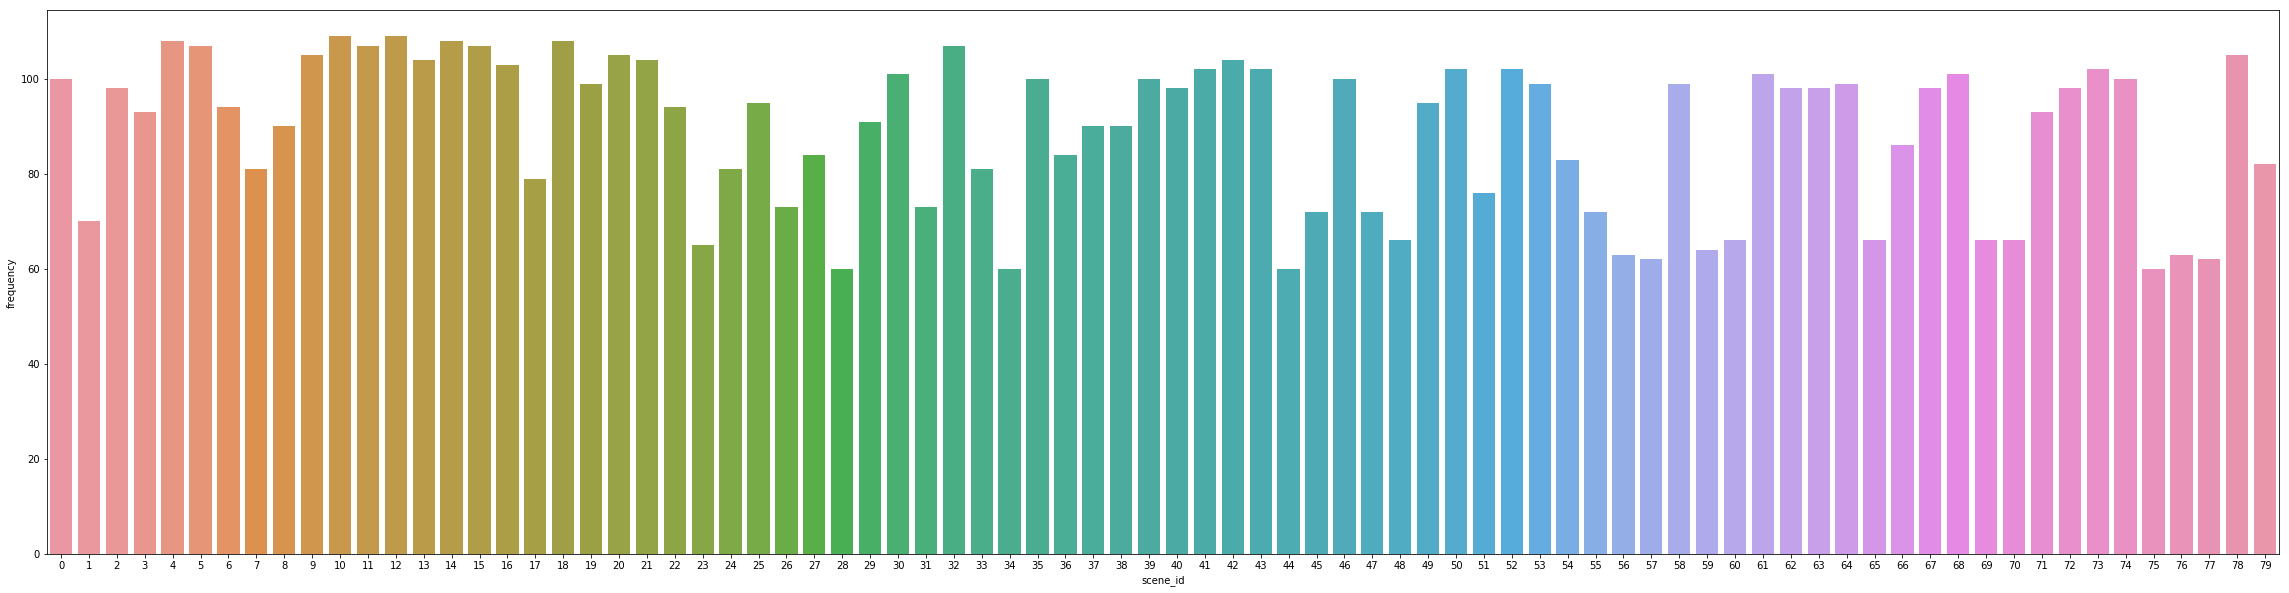

In [23]:
plt.figure(figsize=(40,10))
sns.barplot(x=vlb_df['scene_id'], y=vlb_df['frequency'])

## Transforms

In [29]:
train_transforms = transforms.Compose([
    ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    fancy_pca(mu=0, sigma=0.01),
    transforms.RandomSizedCrop(360),
    transforms.RandomHorizontalFlip()
])

train_img_path = '/home/wangshuo/experiment/compet/AIC/datasets/ai_challenger_scene_train_20170904/scene_train_images_20170904'
images = os.listdir(train_img_path)

for i, img_name in enumerate(random.sample(images, 3)):
    img = Image.open(os.path.join(train_img_path, img_name)).convert('RGB')
    transformed_img = train_transforms(img)
    img.save(str(i) + '_original' + '.jpg')
    transformed_img.save(str(i) + '_transformed' + '.jpg')
    